# Hybrid Sentiment Trend
Baseline set to Jan 2019 (comparison_score = 0) and cumulative hybrid index over time.

In [1]:

from pathlib import Path
BASE_DIR = Path.cwd()
if BASE_DIR.name == 'notebooks':
    BASE_DIR = BASE_DIR.parent

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

hybrid_path = BASE_DIR / 'data' / 'reports' / 'energy' / 'opec' / 'opec_hybrid_sentiment.csv'
prices_path = BASE_DIR / 'data' / 'processed' / 'master_monthly_prices.csv'

hybrid = pd.read_csv(hybrid_path)
hybrid['date'] = pd.to_datetime(hybrid['date'])
assert not hybrid['hybrid_index'].isna().any(), 'Hybrid index contains NaNs'
jan_baseline = hybrid.loc[hybrid['date'] == pd.Timestamp('2019-01-31'), 'hybrid_index']
print('Jan 2019 baseline hybrid_index:', jan_baseline.iloc[0] if not jan_baseline.empty else 'missing')

PLOTS = BASE_DIR / 'plots'
PLOTS.mkdir(parents=True, exist_ok=True)

Jan 2019 baseline hybrid_index: 0.0


In [2]:
prices = pd.read_csv(prices_path)
prices['date'] = pd.to_datetime(prices['Date'])
merged = hybrid.merge(prices[['date', 'PP_EU', 'Brent']], on='date', how='left')
merged.tail()


,date,comparison_score,hybrid_index,PP_EU,Brent
78,2025-07-31,0.7,8.3,1445.0,69.07
79,2025-08-31,0.7,9.0,1445.0,67.94
80,2025-09-30,0.3,9.3,1445.0,67.66
81,2025-10-31,0.4,9.7,1445.0,64.09
82,2025-11-30,0.3,10.0,NaN,NaN


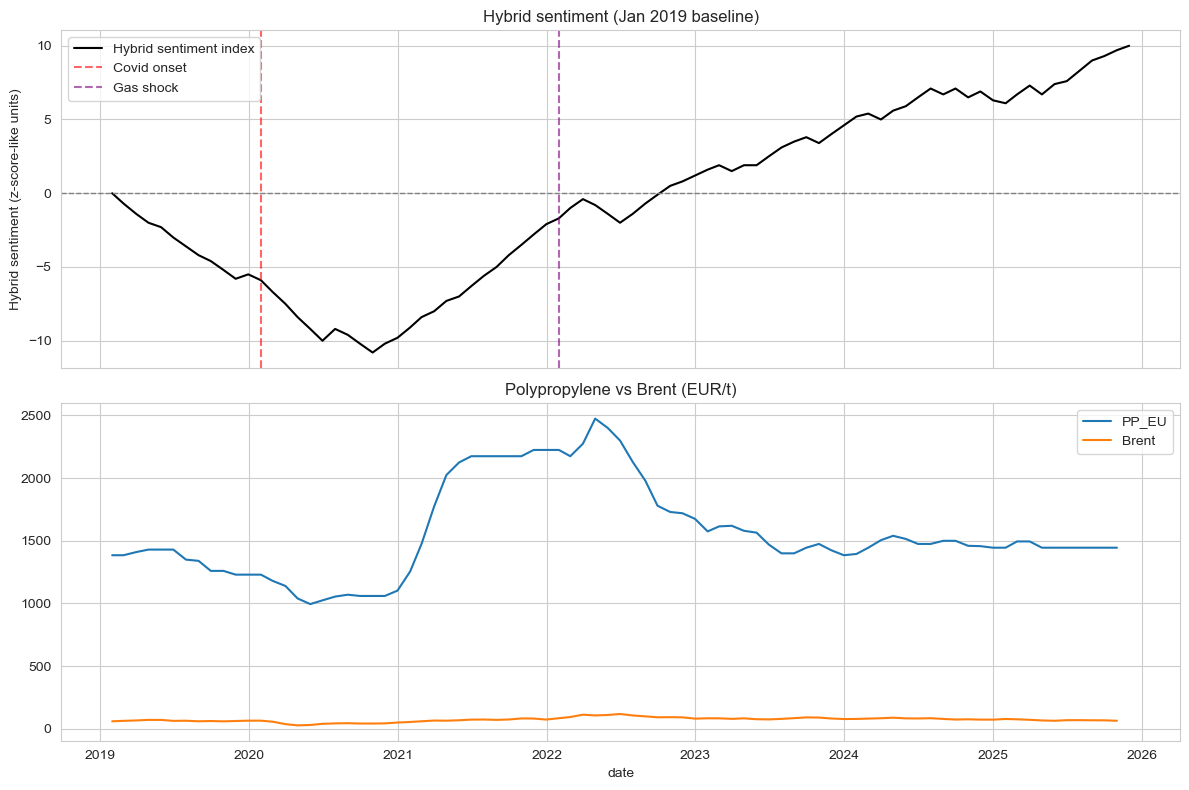

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
sns.lineplot(data=merged, x='date', y='hybrid_index', ax=axes[0], color='black', label='Hybrid sentiment index')
axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[0].set_title('Hybrid sentiment (Jan 2019 baseline)')
axes[0].set_ylabel('Hybrid sentiment (z-score-like units)')
axes[0].axvline(pd.Timestamp('2020-02-01'), color='red', linestyle='--', alpha=0.6, label='Covid onset')
axes[0].axvline(pd.Timestamp('2022-02-01'), color='purple', linestyle='--', alpha=0.6, label='Gas shock')
axes[0].legend()

sns.lineplot(data=merged, x='date', y='PP_EU', ax=axes[1], label='PP_EU')
sns.lineplot(data=merged, x='date', y='Brent', ax=axes[1], label='Brent')
axes[1].set_title('Polypropylene vs Brent (EUR/t)')
axes[1].legend()
for ax in axes:
    if ax is axes[0]:
        continue
    ax.set_ylabel('')
plt.tight_layout()
fig.savefig(PLOTS / 'sentiment05_hybrid_and_pp.png', dpi=150, bbox_inches='tight')
plt.show()
